In [1]:
%matplotlib inline
import networkx as nx
import itertools

## 割当問題

In [2]:
# 問題のデータ
oasis_labels = ['A', 'B', 'C']
person_labels = [1, 2, 3, 4, 5, 6, 7, 8]
dist = [[3, 2, 1, 3, 4, 2, 4, 1],
        [1, 1, 1, 5, 1, 1, 2, 3],
        [2, 4, 4, 2, 4, 2, 1, 2]]
upper_bound = [3, 3, 4]
limit = 3

In [3]:
# ネットワークの作成
G1 = nx.DiGraph()
G1.add_nodes_from(oasis_labels)
G1.add_nodes_from(person_labels)
G1.add_nodes_from(['source', 'target'])
for i in range(len(oasis_labels)):
    for j in range(len(person_labels)):
        if dist[i][j] < limit:
            G1.add_edge(person_labels[j], oasis_labels[i], capacity = 1)
for i in range(len(oasis_labels)):
    G1.add_edge(oasis_labels[i], 'target', capacity = upper_bound[i])
for j in range(len(person_labels)):
    G1.add_edge('source', person_labels[j], capacity = 1)

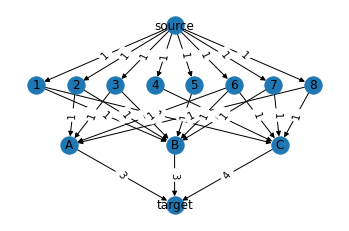

In [4]:
# ネットワークの描画
mypos1 = {}
l = max(len(oasis_labels), len(person_labels))
mypos1['source'] = (0, 30)
mypos1['target'] = (0, 0)
for i in range(len(oasis_labels)):
    mypos1[oasis_labels[i]] =  ((i+0.5)*(l/len(oasis_labels))*2-l, 10)
for j in range(len(person_labels)):
    mypos1[person_labels[j]] = ((j+0.5)*(l/len(person_labels))*2-l, 20)
cap1 = {}
for e in G1.edges():
    cap1[e] = G1.get_edge_data(*e)['capacity']

nx.draw_networkx_edge_labels(G1, pos = mypos1, edge_labels = cap1)
nx.draw(G1, pos = mypos1, with_labels = True)

In [5]:
# 最大s,t流を計算する
f1 = nx.maximum_flow(G1, 'source', 'target')
print(f1)

(8, {'A': {'target': 3}, 'B': {'target': 3}, 'C': {'target': 2}, 1: {'B': 0, 'C': 1}, 2: {'A': 0, 'B': 1}, 3: {'A': 1, 'B': 0}, 4: {'C': 1}, 5: {'B': 1}, 6: {'A': 1, 'B': 0, 'C': 0}, 7: {'B': 1, 'C': 0}, 8: {'A': 1, 'C': 0}, 'source': {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1}, 'target': {}})


In [6]:
# 最大s,t流を描画するための準備
G1f = nx.DiGraph()
G1f.add_nodes_from(oasis_labels)
G1f.add_nodes_from(person_labels)
G1f.add_nodes_from(['source', 'target'])
for v in f1[1].keys():
    for u in f1[1][v]:
        if f1[1][v][u] != 0:
            G1f.add_edge(v, u, flow = f1[1][v][u])

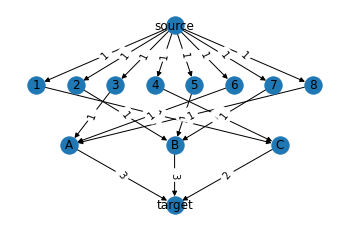

In [7]:
# 最大s,t流の描画
cap1f = {}
for e in G1f.edges():
    cap1f[e] = G1f.get_edge_data(*e)['flow']
    
nx.draw_networkx_edge_labels(G1f, pos = mypos1, edge_labels = cap1f)
nx.draw(G1f, pos = mypos1, with_labels = True)

# グラフの次数制約付き向き付け

In [8]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8])
G.add_edges_from([(1,2), (1,3), (1,4),
                  (2,4), (2,5), (2,8),
                  (3,4), (3,6),
                  (4,5), (4,6),
                  (5,7), (5,8),
                  (6,7),
                  (7,8)])
indeg_bound1 = {1: 1, 2: 2, 3: 2, 4: 2, 5: 3, 6: 1, 7: 2, 8: 1}

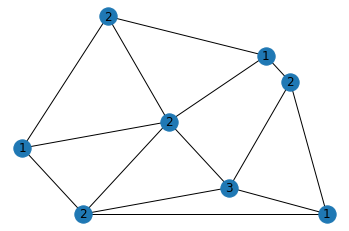

In [9]:
mypos = {1: (0,5), 2: (5,0), 3: (7,15), 
         4: (12,7), 5: (17,2), 6: (20,12),
         7: (22,10), 8: (25,0)}
nx.draw_networkx_labels(G, pos = mypos, labels = indeg_bound1)
nx.draw(G, pos = mypos)

In [10]:
# ネットワークの作成
G1 = nx.DiGraph()
G1.add_nodes_from(G.nodes)
G1.add_nodes_from(G.edges)
G1.add_nodes_from(['source', 'target'])
for e in G.edges:
    for v in G.nodes:
        if v in e:
            G1.add_edge(e, v, capacity = 1)
for e in G.edges:
    G1.add_edge('source', e, capacity = 1)
for v in G.nodes:
    G1.add_edge(v, 'target', capacity = indeg_bound1[v])

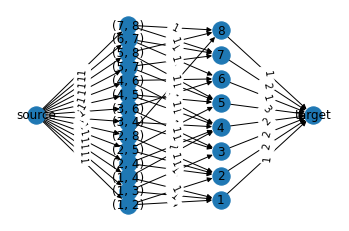

In [11]:
# ネットワークの描画
mypos1 = {}
l = max(G.number_of_nodes(), G.number_of_edges())
mypos1['source'] = (0, 0)
mypos1['target'] = (30, 0)
i = 0
for u in G.nodes:
    mypos1[u] =  (20, ((i+0.5)*(l/G.number_of_nodes())*2-l)*10)
    i = i+1
j = 0
for e in G.edges:
    mypos1[e] = (10, ((j+0.5)*(l/G.number_of_edges())*2-l)*10)
    j = j+1
cap1 = {}
for e in G1.edges():
    cap1[e] = G1.get_edge_data(*e)['capacity']
nx.draw_networkx_edge_labels(G1, pos = mypos1, edge_labels = cap1)
nx.draw(G1, pos = mypos1, with_labels = True)

In [12]:
# 最大s,t流を計算する
f1 = nx.maximum_flow(G1, 'source', 'target')
print(f1)
f1[0] == G.number_of_edges()

(14, {1: {'target': 1}, 2: {'target': 2}, 3: {'target': 2}, 4: {'target': 2}, 5: {'target': 3}, 6: {'target': 1}, 7: {'target': 2}, 8: {'target': 1}, (1, 2): {1: 0, 2: 1}, (1, 3): {1: 1, 3: 0}, (1, 4): {1: 0, 4: 1}, (2, 4): {2: 1, 4: 0}, (2, 5): {2: 0, 5: 1}, (2, 8): {2: 0, 8: 1}, (3, 4): {3: 1, 4: 0}, (3, 6): {3: 1, 6: 0}, (4, 5): {4: 0, 5: 1}, (4, 6): {4: 1, 6: 0}, (5, 7): {5: 0, 7: 1}, (5, 8): {5: 1, 8: 0}, (6, 7): {6: 1, 7: 0}, (7, 8): {7: 1, 8: 0}, 'source': {(1, 2): 1, (1, 3): 1, (1, 4): 1, (2, 4): 1, (2, 5): 1, (2, 8): 1, (3, 4): 1, (3, 6): 1, (4, 5): 1, (4, 6): 1, (5, 7): 1, (5, 8): 1, (6, 7): 1, (7, 8): 1}, 'target': {}})


True

In [13]:
# 最大s,t流を描画するための準備
G1f = nx.DiGraph()
G1f.add_nodes_from(G.nodes)
G1f.add_nodes_from(G.edges)
G1f.add_nodes_from(['source', 'target'])
for v in f1[1].keys():
    for u in f1[1][v]:
        if f1[1][v][u] != 0:
            G1f.add_edge(v, u, flow = f1[1][v][u])

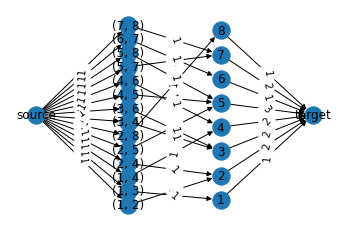

In [14]:
# 最大s,t流の描画
cap1f = {}
for e in G1f.edges:
    cap1f[e] = G1f.get_edge_data(*e)['flow']
nx.draw_networkx_edge_labels(G1f, pos = mypos1, edge_labels = cap1f)
nx.draw(G1f, pos = mypos1, with_labels = True)

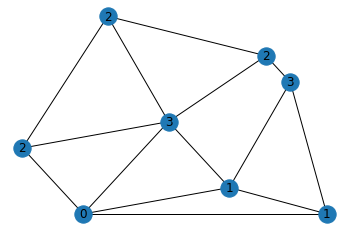

In [15]:
indeg_bound2 = {1: 2, 2: 0, 3: 2, 4: 3, 5: 1, 6: 2, 7: 3, 8: 1}
nx.draw_networkx_labels(G, pos = mypos, labels = indeg_bound2)
nx.draw(G, pos = mypos)

In [16]:
# ネットワークの作成
G1 = nx.DiGraph()
G1.add_nodes_from(G.nodes)
G1.add_nodes_from(G.edges)
G1.add_nodes_from(['source', 'target'])
for e in G.edges:
    for v in G.nodes:
        if v in e:
            G1.add_edge(e, v, capacity = 1)
for e in G.edges:
    G1.add_edge('source', e, capacity = 1)
for v in G.nodes:
    G1.add_edge(v, 'target', capacity = indeg_bound2[v])

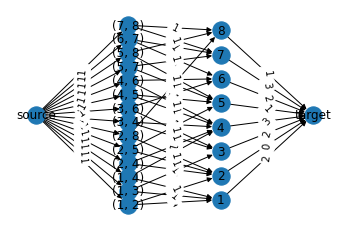

In [17]:
# ネットワークの描画
mypos1 = {}
l = max(G.number_of_nodes(), G.number_of_edges())
mypos1['source'] = (0, 0)
mypos1['target'] = (30, 0)
i = 0
for u in G.nodes:
    mypos1[u] =  (20, ((i+0.5)*(l/G.number_of_nodes())*2-l)*10)
    i = i+1
j = 0
for e in G.edges:
    mypos1[e] = (10, ((j+0.5)*(l/G.number_of_edges())*2-l)*10)
    j = j+1
cap1 = {}
for e in G1.edges():
    cap1[e] = G1.get_edge_data(*e)['capacity']
nx.draw_networkx_edge_labels(G1, pos = mypos1, edge_labels = cap1)
nx.draw(G1, pos = mypos1, with_labels = True)

In [18]:
# 最大s,t流を計算する
f1 = nx.maximum_flow(G1, 'source', 'target')
print(f1)
f1[0] == G.number_of_edges()

(13, {1: {'target': 2}, 2: {'target': 0}, 3: {'target': 2}, 4: {'target': 3}, 5: {'target': 1}, 6: {'target': 2}, 7: {'target': 2}, 8: {'target': 1}, (1, 2): {1: 1, 2: 0}, (1, 3): {1: 0, 3: 1}, (1, 4): {1: 1, 4: 0}, (2, 4): {2: 0, 4: 1}, (2, 5): {2: 0, 5: 1}, (2, 8): {2: 0, 8: 0}, (3, 4): {3: 1, 4: 0}, (3, 6): {3: 0, 6: 1}, (4, 5): {4: 1, 5: 0}, (4, 6): {4: 1, 6: 0}, (5, 7): {5: 0, 7: 1}, (5, 8): {5: 0, 8: 1}, (6, 7): {6: 1, 7: 0}, (7, 8): {7: 1, 8: 0}, 'source': {(1, 2): 1, (1, 3): 1, (1, 4): 1, (2, 4): 1, (2, 5): 1, (2, 8): 0, (3, 4): 1, (3, 6): 1, (4, 5): 1, (4, 6): 1, (5, 7): 1, (5, 8): 1, (6, 7): 1, (7, 8): 1}, 'target': {}})


False

In [19]:
# 最大s,t流を描画するための準備
G1f = nx.DiGraph()
G1f.add_nodes_from(G.nodes)
G1f.add_nodes_from(G.edges)
G1f.add_nodes_from(['source', 'target'])
for v in f1[1].keys():
    for u in f1[1][v]:
        if f1[1][v][u] != 0:
            G1f.add_edge(v, u, flow = f1[1][v][u])

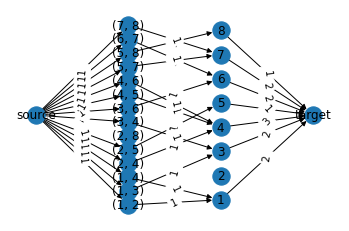

In [20]:
# 最大s,t流の描画
cap1f = {}
for e in G1f.edges:
    cap1f[e] = G1f.get_edge_data(*e)['flow']
nx.draw_networkx_edge_labels(G1f, pos = mypos1, edge_labels = cap1f)
nx.draw(G1f, pos = mypos1, with_labels = True)

In [21]:
# 最小s,tカットの計算
c1 = nx.minimum_cut(G1, 'source', 'target')
print(c1)

(13, ({(1, 2), 2, 5, 8, (2, 8), (4, 5), (5, 7), 'source', (2, 5), (7, 8), (2, 4), (5, 8)}, {1, 3, (6, 7), (4, 6), 6, 7, 4, (1, 3), (1, 4), (3, 6), 'target', (3, 4)}))


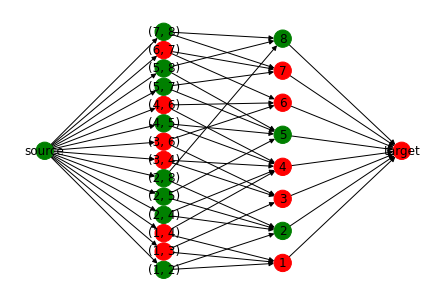

In [22]:
# 最小s,tカットの描画
nodecolor_c = list(map(lambda v: 'g' if v in c1[1][0] else 'r', G1.nodes()))
nx.draw(G1, pos = mypos1, node_color = nodecolor_c, with_labels=True)

## リーグ戦における優勝可能性判定問題

In [23]:
# 問題のデータ
teams = ['NYY', 'BAL', 'BOS', 'TOR', 'DET']
win  = [75, 71, 69, 63, 49]
loss = [59, 63, 66, 72, 86]
gl   = [28, 28, 27, 27, 27] # games left
table = [ [0, 3, 8, 7, 3, 7],
          [3, 0, 2, 7, 4, 12],
          [8, 2, 0, 0, 0, 17],
          [7, 7, 0, 0, 0, 13],
          [3, 4, 0, 0, 0, 20] ]

In [24]:
# 優勝可能性を判定すチーム名
target = 'DET'

In [25]:
# ネットワークの作成
G2 = nx.DiGraph()
teams_left = list(teams)
teams_left.remove(target)
teams_left_pairs = []
target_win = win[teams.index(target)] + sum(table[teams.index(target)])
for p in itertools.combinations(teams_left, 2):
    teams_left_pairs.append(p)
G2.add_nodes_from(teams_left)
G2.add_nodes_from(teams_left_pairs)
G2.add_nodes_from(['source', 'target'])
for t in teams_left:
    for p in teams_left_pairs:
        if t in p:
            G2.add_edge(p, t, capacity = float("inf"))
for t in teams_left:
    G2.add_edge(t, 'target', capacity = target_win-win[teams.index(t)])
for p in teams_left_pairs:
    G2.add_edge('source', p, capacity = table[teams.index(p[0])][teams.index(p[1])])

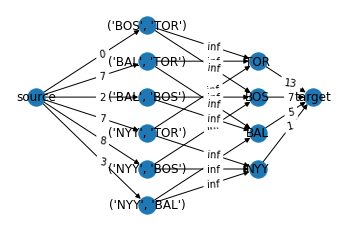

In [26]:
# ネットワークの描画
mypos2 = {}
l2 = len(teams_left_pairs)
mypos2['source'] = (0, 0)
mypos2['target'] = (300, 0)
for i in range(len(teams_left)):
    mypos2[teams_left[i]] = (240, i*10 - len(teams_left)*5)
for j in range(len(teams_left_pairs)):
    mypos2[teams_left_pairs[j]] = (120, j*10 - len(teams_left_pairs)*5)
cap2 = {}
for e in G2.edges():
    cap2[e] = G2.get_edge_data(*e)['capacity']
nx.draw_networkx_edge_labels(G2, pos = mypos2, label_pos = 0.4, edge_labels = cap2)
nx.draw(G2, pos = mypos2, with_labels = True)

In [27]:
# 最大s,t流を計算する
f2 = nx.maximum_flow(G2, 'source', 'target')
print(f2)

(26, {'NYY': {'target': 1}, 'BAL': {'target': 5}, 'BOS': {'target': 7}, 'TOR': {'target': 13}, ('NYY', 'BAL'): {'NYY': 0, 'BAL': 3}, ('NYY', 'BOS'): {'NYY': 1, 'BOS': 7}, ('NYY', 'TOR'): {'NYY': 0, 'TOR': 6}, ('BAL', 'BOS'): {'BAL': 2, 'BOS': 0}, ('BAL', 'TOR'): {'BAL': 0, 'TOR': 7}, ('BOS', 'TOR'): {'BOS': 0, 'TOR': 0}, 'source': {('NYY', 'BAL'): 3, ('NYY', 'BOS'): 8, ('NYY', 'TOR'): 6, ('BAL', 'BOS'): 2, ('BAL', 'TOR'): 7, ('BOS', 'TOR'): 0}, 'target': {}})


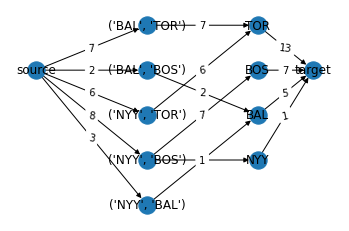

In [28]:
# 最大s,t流を描画するための準備
G2f = nx.DiGraph()
G2.add_nodes_from(teams_left)
G2.add_nodes_from(teams_left_pairs)
G2.add_nodes_from(['source', 'target'])
for v in f2[1].keys():
    for u in f2[1][v]:
        if f2[1][v][u] != 0:
            G2f.add_edge(v, u, flow = f2[1][v][u])
cap2f = {}
for e in G2f.edges():
    cap2f[e] = G2f.get_edge_data(*e)['flow']
# 最大s,t流の描画
nx.draw_networkx_edge_labels(G2f, pos = mypos2, edge_labels = cap2f)
nx.draw(G2f, pos = mypos2, with_labels = True)